In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters
from tifffile import imsave, imread
from glob import glob

from utilities import background_correction

### Determine the experiment

In [2]:
experiment = '20220729_20220802-GPMVs-fromPCCtraiteeLATA'

### Read and show the images

In [3]:
# Read all the images in each directory
epi_positive1 = np.array(list(map(imread, sorted(glob(f'Data/{experiment}/AC2/AVG*.tif')))))
epi_positive2 = np.array(list(map(imread, sorted(glob(f'Data/{experiment}/AC1/AVG*.tif')))))
epi_negative  = np.array(list(map(imread, sorted(glob(f'Data/{experiment}/isotype/AVG*.tif')))))

# Read all the masks in each directory

mask_positive1 = np.array(list(map(imread, sorted(glob(f'Data/{experiment}/AC2/mask*.tif')))))
mask_positive2 = np.array(list(map(imread, sorted(glob(f'Data/{experiment}/AC1/mask*.tif')))))
mask_negative  = np.array(list(map(imread, sorted(glob(f'Data/{experiment}/isotype/mask*.tif')))))

# Subtract the background
epi_positive1 = np.array([background_correction(img) for img in epi_positive1])
epi_positive2 = np.array([background_correction(img) for img in epi_positive2])
epi_negative  = np.array([background_correction(img) for img in epi_negative])

# Normalize the mask
mask_positive1 = mask_positive1 / mask_positive1.max()
mask_positive2 = mask_positive2 / mask_positive2.max()
mask_negative  = mask_negative / mask_negative.max()


print(epi_positive1.shape, mask_positive1.shape, epi_positive2.shape, mask_positive2.shape, epi_negative.shape, mask_negative.shape)

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offs

(6, 512, 512) (6, 512, 512) (9, 512, 512) (9, 512, 512) (3, 512, 512) (3, 512, 512)


### Compare the signals for each GPMV

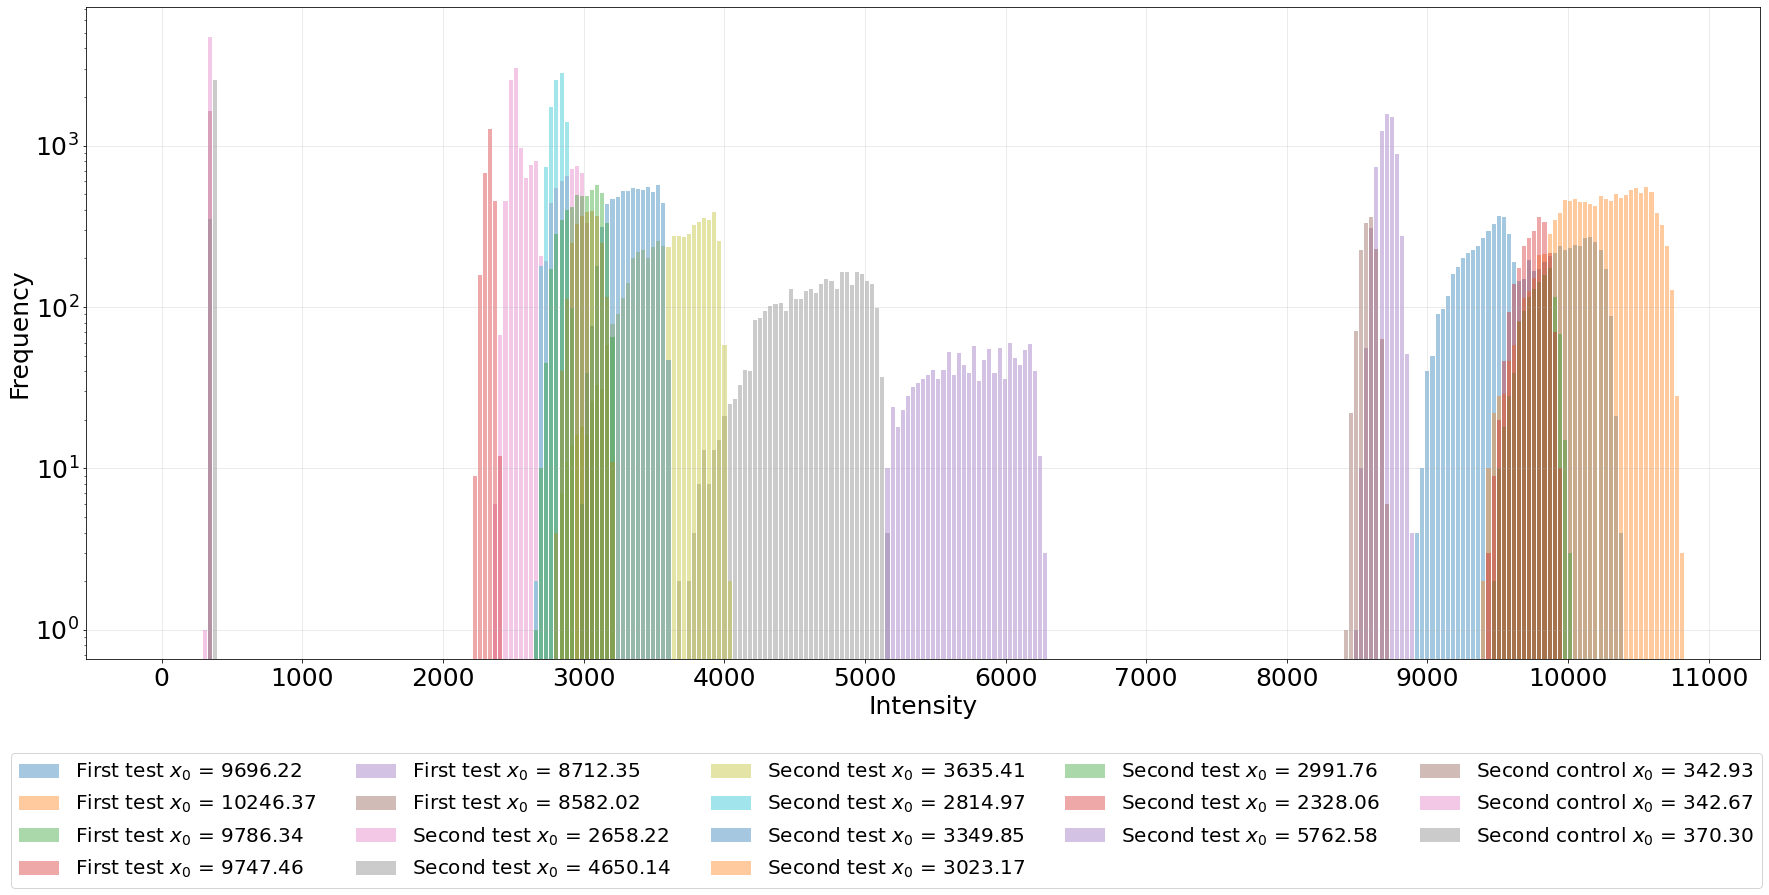

In [4]:
# Extract the segmented signals
signal_positive1 = np.array([img * mask for img, mask in zip(epi_positive1, mask_positive1)])
signal_positive2 = np.array([img * mask for img, mask in zip(epi_positive2, mask_positive2)])
signal_negative  = np.array([img * mask for img, mask in zip(epi_negative, mask_negative)])

# plot a comparison of the two histogram
plt.figure(figsize=(30,12))
for signal in signal_positive1:
    signal = signal[signal > 0].ravel()
    plt.hist(signal, bins=np.linspace(0, signal_positive1.max(), 300), rwidth=0.8, label=f'First test $x_0$ = {signal.mean():.2f}', alpha=0.4)
    
for signal in signal_positive2:
    signal = signal[signal > 0].ravel()
    plt.hist(signal, bins=np.linspace(0, signal_positive1.max(), 300), rwidth=0.8, label=f'Second test $x_0$ = {signal.mean():.2f}', alpha=0.4)
    
for signal in signal_negative:
    signal = signal[signal > 0].ravel()
    plt.hist(signal, bins=np.linspace(0, signal_positive1.max(), 300), rwidth=0.8, label=f'Second control $x_0$ = {signal.mean():.2f}', alpha=0.4)
#plt.title('GPMV epifluorescent signal', fontsize=30)
plt.yscale('log')
plt.xlabel('Intensity', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(np.arange(0, 12000, 1000), fontsize=25)
plt.yticks(fontsize=25)
plt.legend(ncol=5, fontsize=20, loc=(-0.045,-0.35))
plt.grid(alpha=0.3)

plt.savefig(f'Data/{experiment}/epi_comparison_each_cell')
plt.show()    

### Compare the signals for each sample

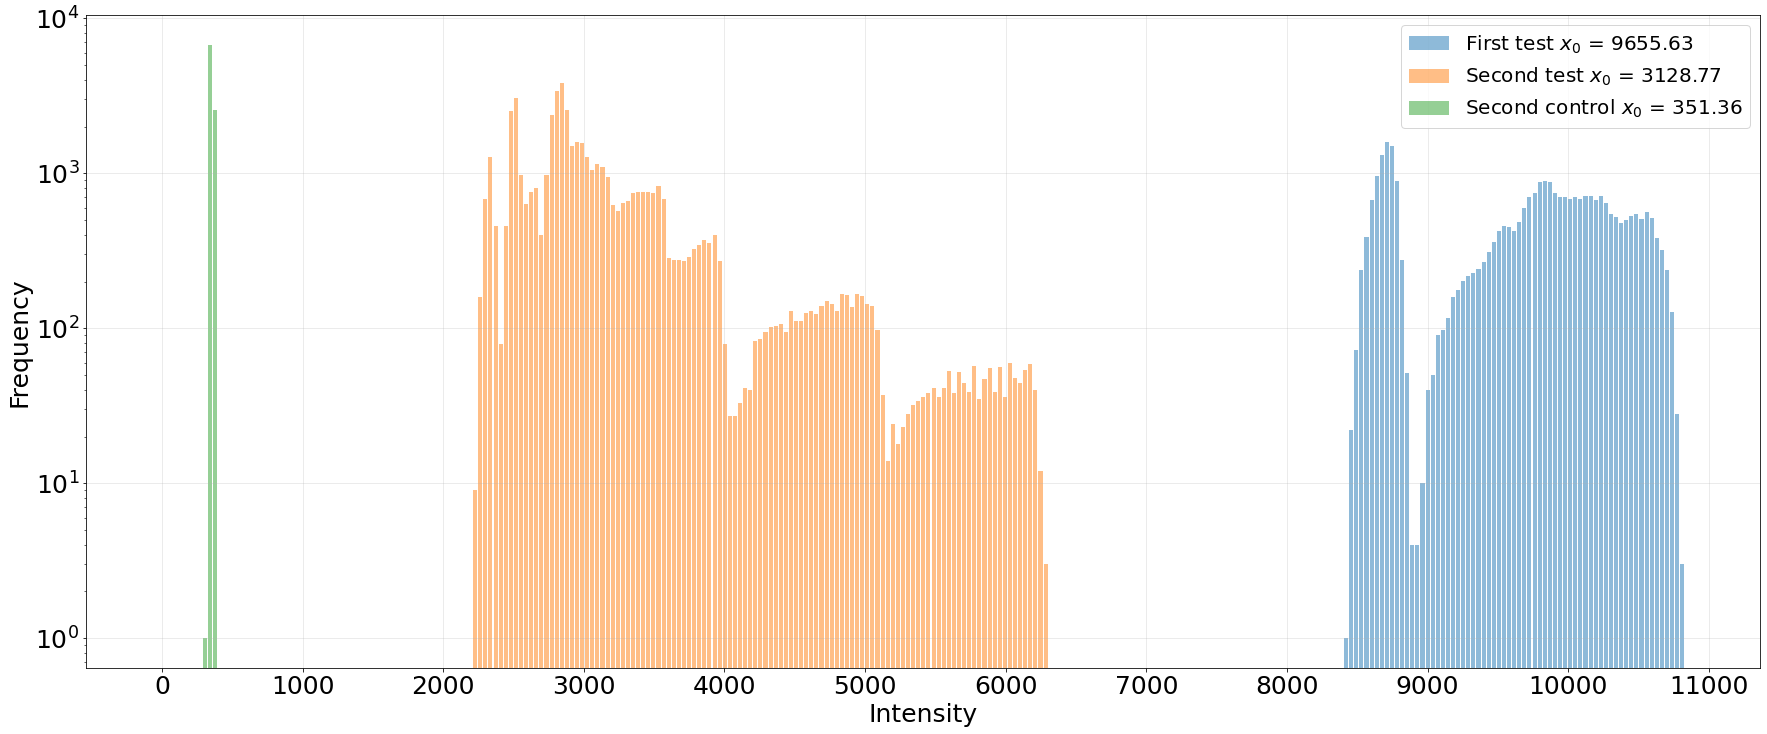

In [5]:
# Flat the array and exclud the zero
signal_positive1 = signal_positive1[signal_positive1 > 0].ravel()
signal_positive2 = signal_positive2[signal_positive2 > 0].ravel()
signal_negative  = signal_negative[signal_negative > 0].ravel()

# plot a comparison of the two histogram
plt.figure(figsize=(30,12))
plt.hist(signal_positive1, bins=np.linspace(0, signal_positive1.max(), 300), rwidth=0.8, label=f'First test $x_0$ = {signal_positive1.mean():.2f}', alpha=0.5)
plt.hist(signal_positive2, bins=np.linspace(0, signal_positive1.max(), 300), rwidth=0.8, label=f'Second test $x_0$ = {signal_positive2.mean():.2f}', alpha=0.5)
plt.hist(signal_negative, bins=np.linspace(0, signal_positive1.max(), 300), rwidth=0.8, label=f'Second control $x_0$ = {signal_negative.mean():.2f}', alpha=0.5)
#plt.title('GPMV epifluorescent signal', fontsize=30)
plt.yscale('log')
plt.xlabel('Intensity', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(np.arange(0, 12000, 1000), fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20, loc='upper right')
plt.grid(alpha=0.3)

plt.savefig(f'Data/{experiment}/epi_comparison')
plt.show()

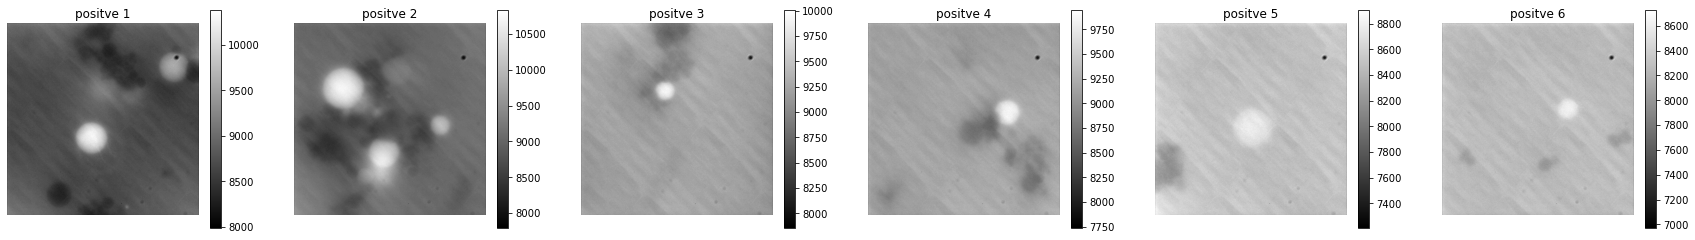

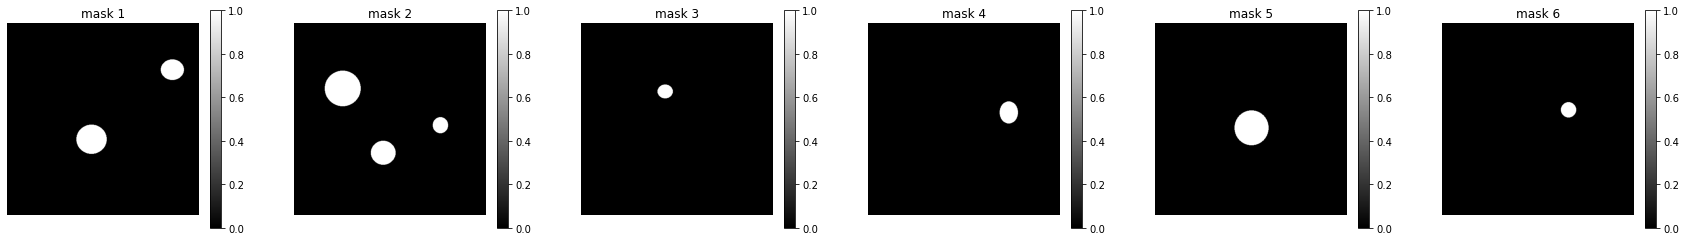

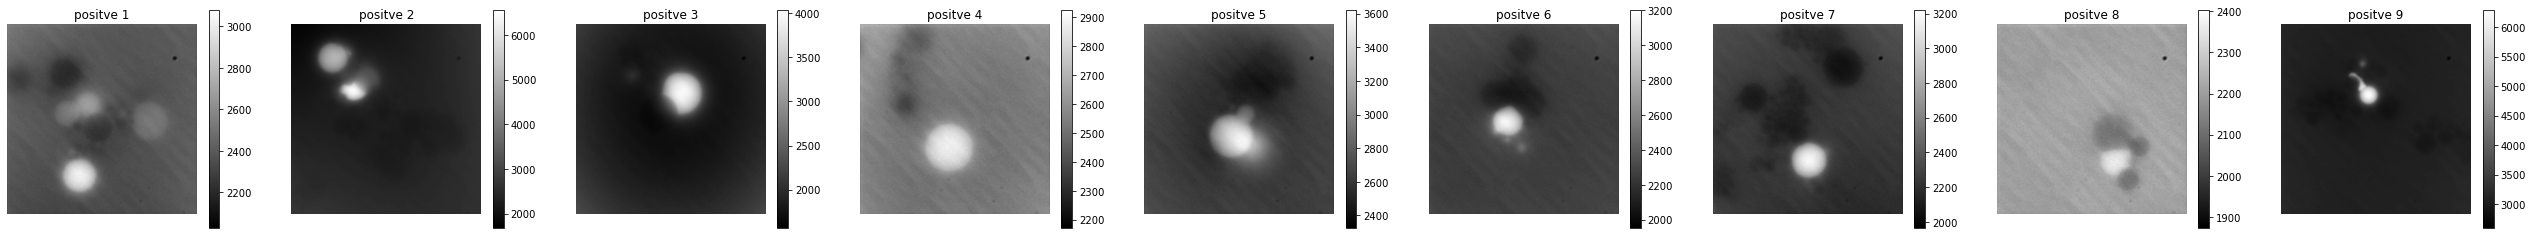

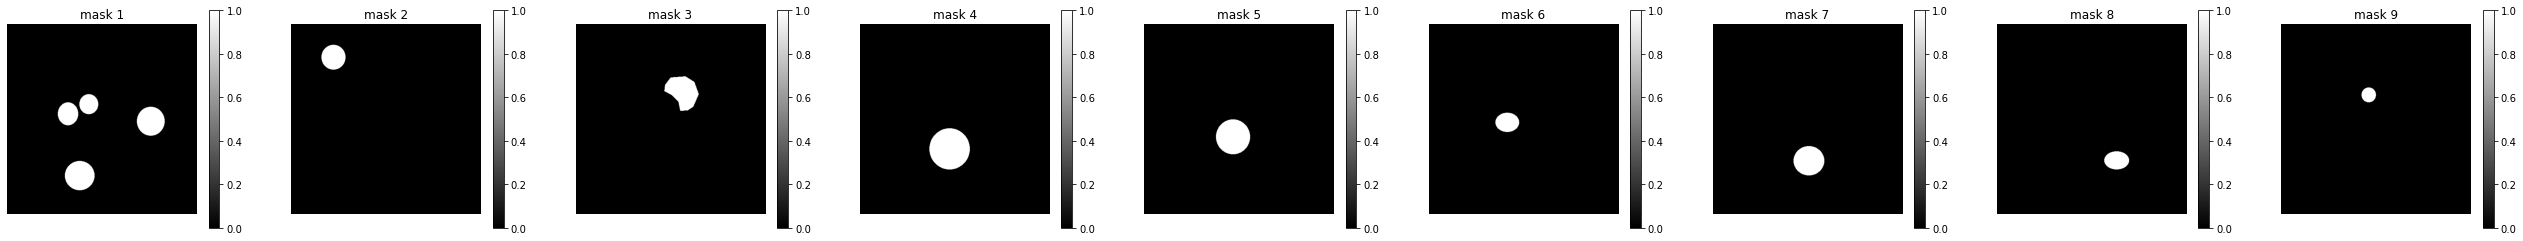

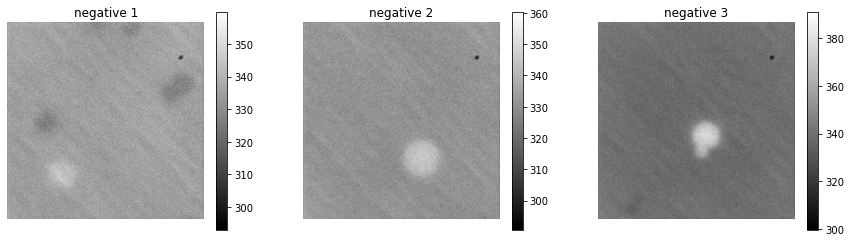

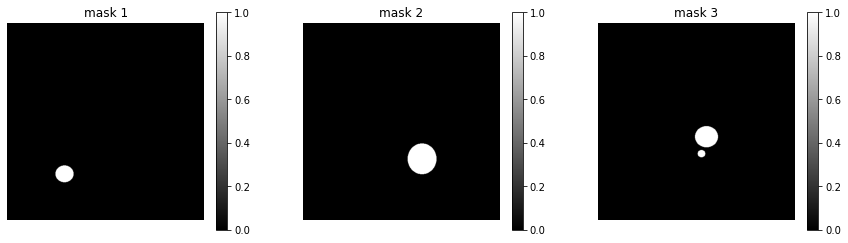

In [6]:
# Plot all the images
plt.figure(figsize=(5*epi_positive1.shape[0], 4))

for i, img in enumerate(epi_positive1):
    plt.subplot(1, epi_positive1.shape[0], i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'positve {i+1}')
    plt.colorbar()

plt.show()

plt.figure(figsize=(5*mask_positive1.shape[0], 4))

for i, img in enumerate(mask_positive1):
    plt.subplot(1, mask_positive1.shape[0], i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'mask {i+1}')
    plt.colorbar()

plt.show()

plt.figure(figsize=(5*epi_positive2.shape[0], 4))

for i, img in enumerate(epi_positive2):
    plt.subplot(1, epi_positive2.shape[0], i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'positve {i+1}')
    plt.colorbar()

plt.show()

plt.figure(figsize=(5*mask_positive2.shape[0], 4))

for i, img in enumerate(mask_positive2):
    plt.subplot(1, mask_positive2.shape[0], i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'mask {i+1}')
    plt.colorbar()

plt.show()

plt.figure(figsize=(5*epi_negative.shape[0], 4))

for i, img in enumerate(epi_negative):
    plt.subplot(1, epi_negative.shape[0], i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'negative {i+1}')
    plt.colorbar()

plt.show()

plt.figure(figsize=(5*mask_negative.shape[0], 4))

for i, img in enumerate(mask_negative):
    plt.subplot(1, mask_negative.shape[0], i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'mask {i+1}')
    plt.colorbar()

plt.show()

In [19]:
most_probable = []
for img in epi_positive:
    n, bins, patches = plt.hist(img.ravel(), bins=128, alpha=0.3)
    most_probable.append(bins[np.argmax(n)])
    
plt.close()

heighest_most_probable = max(most_probable)
print(most_probable, heighest_most_probable)

[8736.1953125, 9083.46875, 9308.875, 9238.375, 8568.703125, 8292.53125] 9308.875


[8700.021112987464, 9040.496961763589, 9213.169714333155, 9139.170508504327, 8479.987054261903, 8249.880803820612] 9213.169714333155


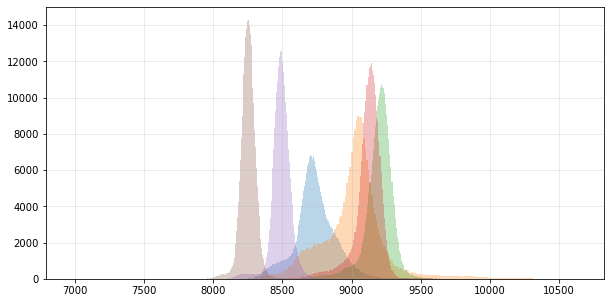

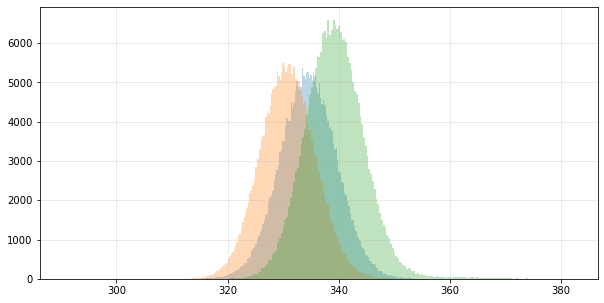

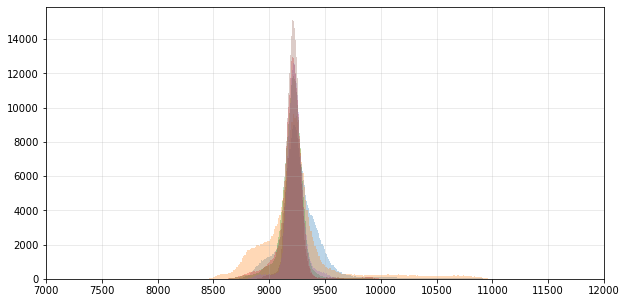

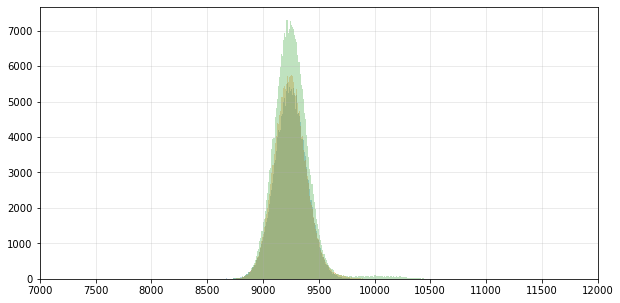

In [6]:
most_probable = []
for img in [img * (1-mask) for img, mask in zip(epi_positive, mask_positive)]:
    n, bins, patches = plt.hist(img[img > 0].ravel(), bins=256, alpha=0.3)
    most_probable.append(bins[np.argmax(n)])
    
plt.close()

heighest_most_probable = max(most_probable)
print(most_probable, heighest_most_probable)


plt.figure(figsize=(10,5))

epi_positive_equalized = []
for i, img in enumerate([img * (1-mask) for img, mask in zip(epi_positive, mask_positive)]):
    n, bins, patches = plt.hist(img[img > 0].ravel(), bins=256, alpha=0.3)
    epi_positive_equalized.append(epi_positive[i] * (heighest_most_probable / bins[np.argmax(n)]))
    
plt.grid(alpha=0.3)
plt.show()


plt.figure(figsize=(10,5))

epi_negative_equalized = []
for i, img in enumerate([img * (1-mask) for img, mask in zip(epi_negative, mask_negative)]):
    n, bins, patches = plt.hist(img[img > 0].ravel(), bins=256, alpha=0.3)
    epi_negative_equalized.append(epi_negative[i] * (heighest_most_probable / bins[np.argmax(n)]))
    
plt.grid(alpha=0.3)
plt.show()


plt.figure(figsize=(10,5))

for img in epi_positive_equalized:
    n, bins, patches = plt.hist(img[img > 0].ravel(), bins=256, alpha=0.3)

plt.xticks(np.linspace(7000,12000,11))
plt.grid(alpha=0.3)
plt.show()


plt.figure(figsize=(10,5))

for img in epi_negative_equalized:
    n, bins, patches = plt.hist(img[img > 0].ravel(), bins=256, alpha=0.3)

plt.xticks(np.linspace(7000,12000,11))
plt.grid(alpha=0.3)
plt.show()

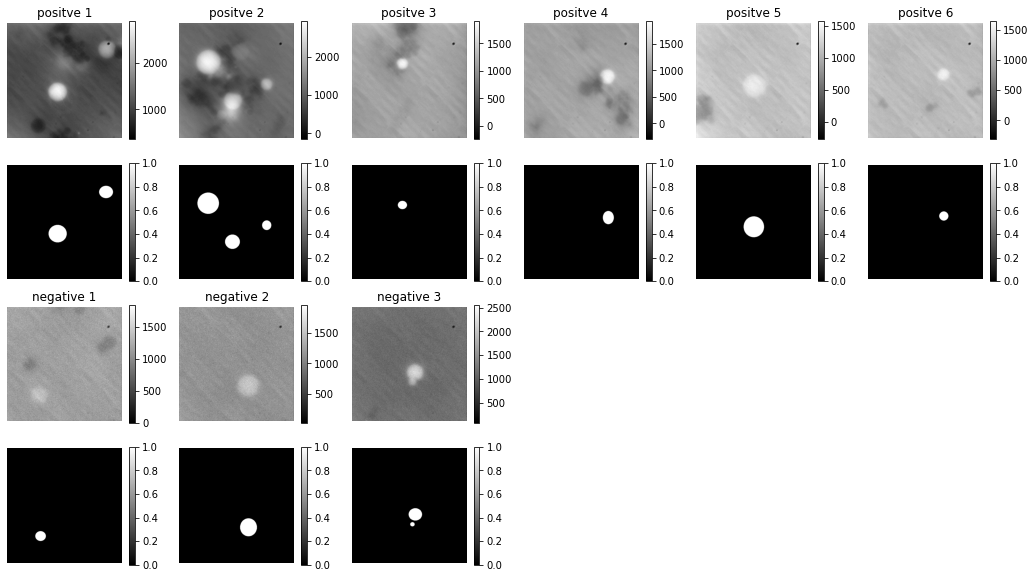

In [11]:
# # Read all the images in each directory
# epi_positive = np.array(epi_positive_equalized)
# epi_negative = np.array(epi_negative_equalized)

# # Equalize the Intensity between the positive and negative
# if epi_positive.mean() > epi_negative.mean():
#     epi_negative *= int(epi_positive.mean()/epi_negative.mean())
# else:
#     epi_negative *= int(epi_negative.mean()/epi_positive.mean())

# Subtract the base line
base_line = np.max([epi_positive1.min(), epi_positive2.min(), epi_negative.min()])
epi_positive1 -= base_line
epi_positive2 -= base_line
epi_negative -= base_line

# Save the stackes in tiff format
imsave(f'Data/{experiment}/positve1.tif', epi_positive1)
imsave(f'Data/{experiment}/positve2.tif', epi_positive1)
imsave(f'Data/{experiment}/negative.tif', epi_negative)

# Extract the segmented signals
signal_positive1 = np.array([img * mask for img, mask in zip(epi_positive1, mask_positive1)])
signal_positive2 = np.array([img * mask for img, mask in zip(epi_positive2, mask_positive2)])
signal_negative = np.array([img * mask for img, mask in zip(epi_negative, mask_negative)])

# Plot all the images
plt.figure(figsize=(3*epi_positive.shape[0], 10))

for i, img in enumerate(epi_positive):
    plt.subplot(4, epi_positive.shape[0], i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'positve {i+1}')
    plt.colorbar()
    
for i, img in enumerate(mask_positive):
    plt.subplot(4, mask_positive.shape[0], i+1+epi_positive.shape[0])
    plt.imshow(img > filters.threshold_otsu(img), cmap='gray')
    plt.axis('off')
    plt.colorbar()
    
for i, img in enumerate(epi_negative):
    plt.subplot(4, epi_positive.shape[0], i+1+2*epi_positive.shape[0])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'negative {i+1}')
    plt.colorbar()
    
for i, img in enumerate(mask_negative):
    plt.subplot(4, epi_positive.shape[0], i+1+3*epi_positive.shape[0])
    plt.imshow(img > filters.threshold_otsu(img), cmap='gray')
    plt.axis('off')
    plt.colorbar()

plt.savefig(f'Data/{experiment}/summary')
plt.show()